# Logistic Regression

Logistic regression is a simple machine learning algorithm for classification.
In this toy example we are going to use it to decide, to which of two distributions a data point belongs.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(842424)

In [4]:
nSamples = 1000
inputDim = 2
outputDim = 1

In [43]:
batchSize = 50
nEpochs = 100

## Data Generation

In [6]:
x1 = np.random.normal(1., 0.25, (nSamples//2, inputDim))
x2 = np.random.normal(2., 0.30, (nSamples//2, inputDim))
y1 = np.zeros(nSamples//2)
y2 = np.ones(nSamples//2)
x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))

In [7]:
shuffled = np.arange(nSamples)
np.random.shuffle(shuffled)
xs = x[shuffled]
ys = y[shuffled]

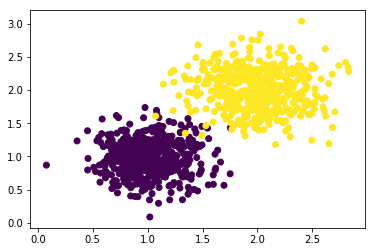

In [26]:
plt.scatter(*zip(*(np.concatenate((x1, x2)))), c=np.concatenate((np.zeros(len(x1)), np.ones(len(x2)))))

## The Logistic Function

In [28]:
def activation(z):
    return 1 / (1 + np.exp(-z))

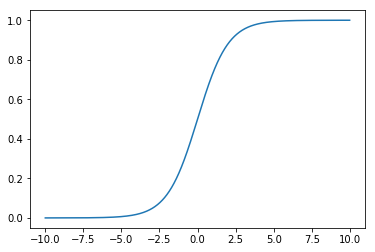

In [30]:
plt.plot(np.arange(-10, 10, 0.01), activation(np.arange(-10, 10, 0.01)))

In [50]:
def lr_predict(weights, x_b):
    return activation(np.dot(x_b, weights))

## The Loss Function


In [51]:
def lr_loss(weights, x_b, label):
    loss = 0.
    inputDim = x.shape[0]
    grad = np.zeros(inputDim + 1)
    
    y = lr_predict(weights, x_b)
    
    loss = (y - label)**2 / 2
    
    grad = -(y - label) * y**2 * np.exp(-np.dot(weights, x_b)) * x_b
    
    return loss, grad

## Training the Model Manually

In [54]:
def lr_train(x, labels, nEpochs, lr=0.01):
    weights = np.zeros(x.shape[1]+1)
    x_b = np.hstack((np.ones((x.shape[0], 1)), x))    
    for epoch in range(nEpochs):
        sumloss = 0.
        for n in range(nSamples):
            loss, grad = lr_loss(weights, x_b[n], labels[n])
            sumloss += loss
            weights += lr * grad
        sumloss /= nSamples
        if epoch % 10 == 0:
            print(epoch, sumloss)
    return weights

In [55]:
weights = lr_train(xs, ys, nEpochs)

0 0.1125483507813009
10 0.050300679863254594
20 0.03186287073827558
30 0.023903280871772317
40 0.01952491975810366
50 0.016752551108945964
60 0.014833159165448067
70 0.01342061517545
80 0.01233409828628469
90 0.011469996996959757


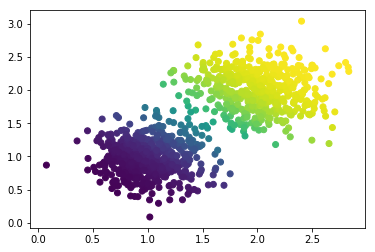

In [56]:
plt.scatter(*zip(*xs), c=[lr_predict(weights, x) for x in np.hstack((np.ones((x.shape[0], 1)), xs))])

## Keras

In [57]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [58]:
model = Sequential()
model.add(Dense(outputDim, input_dim=inputDim, activation='sigmoid'))

In [59]:
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.9)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

In [60]:
fit = model.fit(xs, ys, batch_size=batchSize, epochs=nEpochs)

Epoch 1/100
1000/1000 [==============================] - 0s 90us/step - loss: 0.3444 - acc: 0.4730
Epoch 2/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.2333 - acc: 0.5420
Epoch 3/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1889 - acc: 0.7280
Epoch 4/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1532 - acc: 0.9010
Epoch 5/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1292 - acc: 0.9540
Epoch 6/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1108 - acc: 0.9730
Epoch 7/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0970 - acc: 0.9850
Epoch 8/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0863 - acc: 0.9890
Epoch 9/100
1000/1000 [==============================] - 0s 14us/step - loss: 0.0779 - acc: 0.9900
Epoch 10/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.0710 - acc: 0.9900
Epoch 11/

1000/1000 [==============================] - 0s 16us/step - loss: 0.0162 - acc: 0.9930
Epoch 84/100
1000/1000 [==============================] - 0s 18us/step - loss: 0.0162 - acc: 0.9930
Epoch 85/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.0160 - acc: 0.9930
Epoch 86/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.0159 - acc: 0.9930
Epoch 87/100
1000/1000 [==============================] - 0s 18us/step - loss: 0.0158 - acc: 0.9920
Epoch 88/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.0158 - acc: 0.9930
Epoch 89/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0156 - acc: 0.9930
Epoch 90/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0155 - acc: 0.9920
Epoch 91/100
1000/1000 [==============================] - 0s 19us/step - loss: 0.0155 - acc: 0.9920
Epoch 92/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0154 - acc: 0.9920
Epoch 93/100


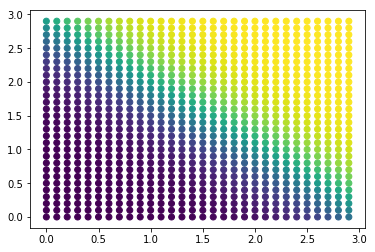

In [61]:
ls = np.zeros((30, 30))
ms = np.zeros((30, 30))
ns = np.zeros((30, 30))
for i in range(30):
    for j in range(30):
        ms[i, j] = i/10
        ns[i, j] = j/10
        ls[i, j] = model.predict(np.array([ms[i, j], ns[i, j]]).reshape((1, 2)))
ms.flatten()
ns.flatten()
ls.flatten()

# fig, (ax1, ax2) = plt.subplots(1, 2)

plt.scatter(ms, ns, c=ls)

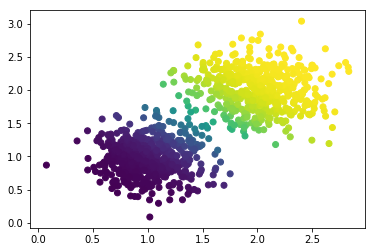

In [62]:
plt.scatter(*zip(*xs), c=model.predict(xs, batchSize).reshape(nSamples, ))